# Movie Reviewer

In [1]:
critics = {
    'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 'The Night Listener': 3.0},
    'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 'Just My Luck': 1.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5, 'The Night Listener': 3.0},
    'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0},
    'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'Superman Returns': 4.0, 'You, Me and Dupree': 2.5},
    'Mick LaSalle': {'Lady in the Water': 2.5, 'Snakes on a Plane': 4.0, 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'You, Me and Dupree': 2.0, 'The Night Listener': 3.0},
    'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5, 'The Night Listener': 3.0},
    'Toby': {'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}
    }

In [2]:
print(critics['Lisa Rose']['Lady in the Water'])

2.5


In [19]:
Jack_review = critics['Jack Matthews']
print(Jack_review)

{'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5, 'The Night Listener': 3.0}


# Find similar users 

## Plot

In [22]:
Lisa_score = []
Jack_score = []
for movie in critics['Lisa Rose']:
    if movie in Jack_review:
        print(movie, end=', ')
        Lisa_score.append(critics['Lisa Rose'][movie])
        Jack_score.append(critics['Jack Matthews'][movie])
print(Lisa_score)
print(Jack_score)

Lady in the Water, Snakes on a Plane, Superman Returns, You, Me and Dupree, The Night Listener, [2.5, 3.5, 3.5, 2.5, 3.0]
[3.0, 4.0, 5.0, 3.5, 3.0]


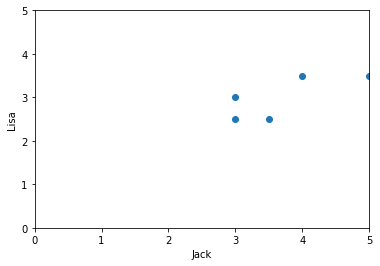

In [30]:
import matplotlib.pyplot as plt
plt.xlim(0.0, 5.0)
plt.ylim(0.0, 5.0)
plt.xlabel('Jack')
plt.ylabel('Lisa')
plt.scatter(Jack_score, Lisa_score)
plt.show()

## Pearson's correlation

In [33]:
import math
def sim_pearson(dic, name1, name2):
    same_movies = {}
    for item in dic[name1]:
        if item in dic[name2]:
            same_movies[item] = 1
    
    num_movies = len(same_movies)
    
    if num_movies == 0:
        return 0
    
    sum1 = sum([dic[name1][movie] for movie in same_movies])
    sum2 = sum([dic[name2][movie] for movie in same_movies])

    sum1_sq = sum([pow(dic[name1][movie], 2) for movie in same_movies])
    sum2_sq = sum([pow(dic[name2][movie], 2) for movie in same_movies])

    p_sum = sum([dic[name1][movie] * dic[name2][movie] for movie in same_movies])

    num = p_sum - (sum1 * sum2 / num_movies)
    den = math.sqrt((sum1_sq - pow(sum1, 2)/num_movies) * (sum2_sq - pow(sum2, 2)/num_movies))

    if den == 0:
        return 0
    
    r = num / den

    return r

In [34]:
print(sim_pearson(critics, 'Lisa Rose', 'Jack Matthews'))

0.7470178808339965


## Ranking by correlation

In [52]:
def top_match(dic, person, n=5):
    names = [name for name in dic if name != person ]
    scores = [sim_pearson(dic, person, name) for name in names]
    sorted_scores = sorted(scores, reverse=True)
    c = 0
    for score in sorted_scores:
        print('{}\t{}'.format(names[scores.index(score)],score))
        c += 1
        if c >= n:
            break
    return

In [53]:
top_match(critics, 'Lisa Rose')

Toby	0.9912407071619299
Claudia Puig	0.9438798074485389
Jack Matthews	0.7470178808339965
Mick LaSalle	0.7372097807744856
Michael Phillips	0.40451991747794525
